In [1]:
from collections import Counter
from wordcloud import WordCloud
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt  # 형태소 분석기

In [2]:
client = MongoClient('mongodb://192.168.0.50')
db_name = client['DB_SGMN']
collection = db_name['COL_SCRAPPING_TOSS_COMMENT_HISTORY']

In [3]:
# 데이터 로드

find_data = collection.find()
toss_data = list(find_data)

In [4]:
df_toss_data = pd.DataFrame(toss_data)
df_toss_data.head(3)

,_id,COMMENT,CREATED_AT,DATE,DATETIME,SYMBOL,UPDATED_AT
0,675082d6239b5012b3c84a0b,머선일이야,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:36:32+09:00,AADI,2024-11-21 23:58:33
1,675082d6239b5012b3c84a0c,뭐냐 너..왜 희망 갖게하냐,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:07:42+09:00,AADI,2024-11-21 23:58:34
2,675082d6239b5012b3c84a0d,몇개월 기다리다가 조금 올라서 뺏더니 잘 올라가네.. ㅠ,2024-11-21 23:59:13.068,2024-11-22,2024-11-22T01:00:04+09:00,AADI,2024-11-21 23:58:34


In [5]:
df_toss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251836 entries, 0 to 251835
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   _id         251836 non-null  object        
 1   COMMENT     251836 non-null  object        
 2   CREATED_AT  251836 non-null  datetime64[ns]
 3   DATE        251836 non-null  object        
 4   DATETIME    251836 non-null  object        
 5   SYMBOL      251836 non-null  object        
 6   UPDATED_AT  251836 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 13.4+ MB


In [6]:
# 3. CREATED_AT 필드 날짜 변환

# CREATED_AT을 datetime 형식으로 변환
df_toss_data['CREATED_AT'] = pd.to_datetime(df_toss_data['CREATED_AT'])

# 주 단위로 그룹화 준비 (연도-주 형식 추가)
df_toss_data['YEAR_WEEK'] = df_toss_data['CREATED_AT'].dt.strftime('%Y-%U')

In [7]:
it_sentence = df_toss_data['COMMENT'].values.tolist() # array list 로 변환 05번 it_sentence 변환 참조

In [8]:
# Okt 형태소 분석기를 사용하여 동사만 추출하는 함수

okt = Okt()

def extract_verbs(text):
    # 형태소 분석 후 동사만 필터링
    return [word for word, pos in okt.pos(text) if pos == 'Noun']

In [9]:
# 주 단위로 그룹화
grouped = df_toss_data.groupby('YEAR_WEEK')

In [10]:
# 주 단위로 TF-IDF 계산 및 워드클라우드 생성
for year_week, group in grouped:
    
    # 댓글을 하나의 리스트로 연결
    sentences = group['COMMENT'].dropna().tolist()
    
    # 동사만 추출하여 새로운 리스트에 저장
    noun_sentences = [' '.join(extract_verbs(comment)) for comment in it_sentence[:100]]

In [11]:
noun_sentences

['머선 일이',
 '뭐 너 왜 희망',
 '몇개 월 조금',
 '얘 얼마 요',
 '애플 출시 목표 시리 전면 개편 추진 내용 대규모 언어 모델 기반 시리 개발 중 시리 프로젝트 진행 의 일부 공개 예정 봄 정식 출시 대화 작업 처리 앱 연동 기능 강화 요약 현재 별도 앱 테스트 중이 기존 시리 대체 예정 수준 대화 인터페이스 인공 지능 기능 구현 텍스트 생 요약 앱 제어 등 기능 통합 단계 기능 도입 시리 출시 준비 사용자 개인정보 보호 중점 차별 전략 추구 핵심 요약 애플 대응 위해 기반 차세대 시리 개발 봄 출시 예정',
 '거 횡보',
 '흠',
 '애플 주주',
 '짝 짝',
 '최고',
 '',
 '더',
 '음',
 '평생 간다 주식 체결 완료',
 '단타',
 '',
 '',
 '감',
 '진짜 애플 금사',
 '진입 장투',
 '진입 완료',
 '왜',
 '겨울 사과 사과',
 '',
 '천하 애플 기네',
 '슬라 엔비 사과 오늘 맛 별로 언제 맛',
 '애플 재미',
 '척',
 '비중 좀 후',
 '장난 나 지금',
 '적립 기 진짜',
 '',
 '또',
 '',
 '얘 비중 좀',
 '',
 '손실 종목 실현 세금 전략 손실 쭉',
 '애플 주주 언제 상승 빌빌거릴 것입 동학 애플 주주 저력',
 '좀 횡보끝나',
 '레츠고',
 '골든 크로스 추 매각',
 '슬슬',
 '장기 매수 답 애플',
 '',
 '',
 '식이 처음',
 '지금 애플 다시',
 '애플 거 그냥 계속 가지 임',
 '머 총 위 탈환 안해',
 '얘 달 그대로',
 '애플 장점 하락 애플 단점 상승',
 '애플 땡큐',
 '번스타인 애널 리스트 애플 주가 강세 시나리오 최대 상승 가능성 전망 번스타인 애플 중간 자릿수 매출 성장 개선 마진 자본 환원 두 자릿수 순이익 성장 품질 장주 로 평가 토니 사코 나기 애널 리스트 마이너스 현금 전환 주기 감안 때 주가 생각 평가 고 투자자 애플 핵심 보유 주로 유지 주가 하락 때 추가 매수 전략 성과 내용 이 글 정보 

In [12]:
# TF-IDF 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer.fit(noun_sentences) # 학습용
result_vectors = tfidfVectorizer.transform(noun_sentences) # 서비스용

In [13]:
# TF-IDE 결과 확인

result_vectors.toarray().shape, tfidfVectorizer.get_feature_names_out().shape

((100, 317), (317,))

In [14]:
# 문장과 단어 vocab에 대한 매칭 관계 확인
tfidfVectorizer.get_feature_names_out(), result_vectors.toarray()[0]

(array(['가능성', '가용', '가지', '간다', '간주', '감소', '감안', '강세', '강조', '강화', '개발',
        '개선', '개인정보', '개편', '거나', '것입', '겨울', '결정', '계속', '고수', '골든', '공개',
        '관련', '관점', '괜찮죵', '교차', '교체', '구매', '구현', '권유', '그냥', '그대로',
        '글로벌', '금사', '기간', '기기', '기네', '기능', '기록', '기반', '기존', '나기', '나중',
        '내년', '내용', '느낌', '다른', '다시', '단계', '단점', '단타', '대규모', '대비', '대역',
        '대응', '대체', '대표', '대학생', '대화', '더살걸', '도망', '도입', '독사', '동학', '드랍',
        '땡큐', '라라', '라인', '레츠고', '리서치', '리수', '리스트', '리포트', '마감', '마이너스',
        '마지막', '마진', '만가', '매각', '매수', '매우', '매출', '맥미니', '맥북', '머선', '몇개',
        '모델', '모두', '모든', '목적', '목표', '무선', '무선랜', '반면', '방식', '배터리', '버핏',
        '번스타인', '별도', '별로', '보기', '보유', '보호', '브리핑', '비중', '빌빌거릴', '빼액',
        '사고', '사과', '사용자', '사이', '사이클', '사코', '상담', '상승', '생각', '생기', '성과',
        '성장', '세금', '소수점', '손실', '수료', '수익', '수준', '수혜자', '순이익', '슈퍼',
        '스냅드래곤', '스마트폰', '스몰', '스팅', '슬라', '슬슬', '시그널', '시기', '시나리오', '시리',
        '시스템', '시작', '식이', '실현'

In [15]:
# tfidf_scores = result_vectors.toarray().sum(axis=0) # 자료가 너무 많아 오류가 남으로 아래처럼 수정
tfidf_scores = result_vectors.toarray().sum(axis = 0)
tfidf_scores.shape

(317,)

In [16]:
# 5. 상위 20개 단어 선택
tfidf_ranking_20 = sorted(zip(tfidf_scores, tfidfVectorizer.get_feature_names_out())
                          , reverse = True)[:20]
tfidf_ranking_20

[(6.9545534738116945, '애플'),
 (2.0, '비중'),
 (1.905225062443138, '주주'),
 (1.8742551292130492, '프로'),
 (1.7978842333981306, '진짜'),
 (1.726114102032304, '사과'),
 (1.7141418447310877, '지금'),
 (1.6254596637753864, '그냥'),
 (1.3883415653322277, '사고'),
 (1.3832135848461564, '진입'),
 (1.3821958522130982, '주식'),
 (1.3568119178201945, '다시'),
 (1.1358734205342342, '완료'),
 (1.1202051919543867, '퀀텀'),
 (1.1202051919543867, '컴퓨팅'),
 (1.0987881493473142, '중국'),
 (1.0808533974942578, '구매'),
 (1.0644483689918363, '항상'),
 (1.0359069101616647, '팔고'),
 (1.0275536786685793, '정도')]

In [17]:
# 딕셔너리 형태로 상위 20개 단어와 그 점수를 저장합니다.
top20_word = {word:score for score, word in tfidf_ranking_20}
top20_word

{'애플': 6.9545534738116945,
 '비중': 2.0,
 '주주': 1.905225062443138,
 '프로': 1.8742551292130492,
 '진짜': 1.7978842333981306,
 '사과': 1.726114102032304,
 '지금': 1.7141418447310877,
 '그냥': 1.6254596637753864,
 '사고': 1.3883415653322277,
 '진입': 1.3832135848461564,
 '주식': 1.3821958522130982,
 '다시': 1.3568119178201945,
 '완료': 1.1358734205342342,
 '퀀텀': 1.1202051919543867,
 '컴퓨팅': 1.1202051919543867,
 '중국': 1.0987881493473142,
 '구매': 1.0808533974942578,
 '항상': 1.0644483689918363,
 '팔고': 1.0359069101616647,
 '정도': 1.0275536786685793}

In [18]:
wordCloud = WordCloud(background_color='white'
                      , font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

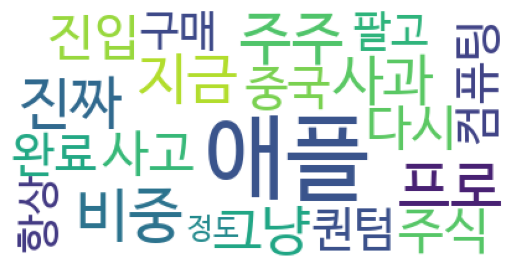

In [19]:
wordCloud.generate_from_frequencies(top20_word)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()